https://en.wikipedia.org/wiki/Cluster_analysis


https://en.wikipedia.org/wiki/Recommender_system

https://datascience.stackexchange.com/questions/118812/best-algorithms-for-clustering-customers-customer-segmentation

https://link.springer.com/article/10.1007/s44196-024-00568-8

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
Hierarchical

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.HDBSCAN.html#sklearn.cluster.HDBSCAN Heirarchical dbscan

https://stats.stackexchange.com/questions/187595/clustering-with-categorical-and-numeric-data

In [134]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import HDBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import numpy as np
import joblib

In [17]:
# load dataset
data = pd.read_csv("cvd_adj.csv")

In [50]:
def create_trainset(df,fract):
    X = df
    randomstate = 42
    numerical_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 
                     'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
    
    standardscaler = StandardScaler()
    X_scaled = standardscaler.fit_transform(X[numerical_columns])
    categorical_columns = X.drop(numerical_columns, axis=1)
    full_data = np.hstack([X_scaled, categorical_columns.to_numpy()])
    
    col = list(X.columns.values)
    
    df_fulldata = pd.DataFrame(columns=col,data = full_data)
    sampled_data = df_fulldata.sample(frac=fract, random_state=randomstate)
    
    return sampled_data

In [69]:
X = create_trainset(data,0.20)

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15443 entries, 302051 to 241618
Data columns (total 38 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Height_(cm)                                          15443 non-null  float64
 1   Weight_(kg)                                          15443 non-null  float64
 2   BMI                                                  15443 non-null  float64
 3   Alcohol_Consumption                                  15443 non-null  float64
 4   Fruit_Consumption                                    15443 non-null  float64
 5   Green_Vegetables_Consumption                         15443 non-null  float64
 6   FriedPotato_Consumption                              15443 non-null  float64
 7   General_Health_Fair                                  15443 non-null  float64
 8   General_Health_Good                                  15443 non-nu

In [94]:
tempdata = data.sample(frac=1, random_state=42)

In [95]:
hdb = HDBSCAN(min_cluster_size=5, n_jobs=-1)
hdb.fit_predict(tempdata)

array([48, 48, 48, ..., 48, 48, 48])

In [90]:
hdb.get_params()

{'algorithm': 'auto',
 'allow_single_cluster': False,
 'alpha': 1.0,
 'cluster_selection_epsilon': 0.0,
 'cluster_selection_method': 'eom',
 'copy': False,
 'leaf_size': 40,
 'max_cluster_size': None,
 'metric': 'euclidean',
 'metric_params': None,
 'min_cluster_size': 5,
 'min_samples': None,
 'n_jobs': -1,
 'store_centers': None}

In [99]:
labels = hdb.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 52
Estimated number of noise points: 2178


In [98]:
labels = hdb.labels_

In [ ]:
score = silhouette_score(tempdata, labels)

For n_clusters = 52 The average silhouette_score is : 0.27489414220778463


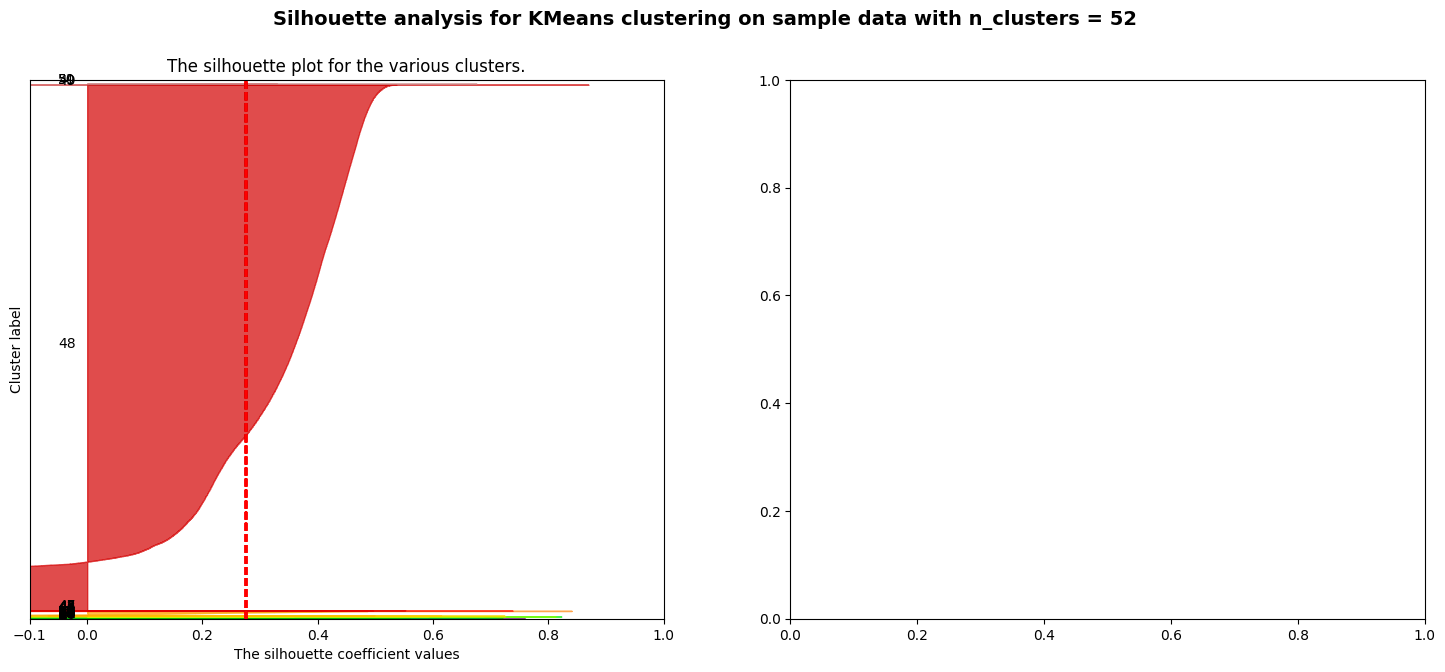

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(tempdata) + (n_clusters_ + 1) * 10])

silhouette_avg = silhouette_score(tempdata, labels)
print(
        "For n_clusters =",
        n_clusters_,
        "The average silhouette_score is :",
        silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(tempdata, labels)

y_lower = 10

for i in range(n_clusters_):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters_)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters_,
        fontsize=14,
        fontweight="bold",
    )

In [104]:
joblib.dump(hdb,"hdb_model.pkl",compress=3)

['hdb_model.pkl']

In [107]:
labels

array([48, 48, 48, ..., 48, 48, 48])

In [120]:
pd.set_option('display.max_columns', 500)

In [108]:
clustered_data = pd.DataFrame(tempdata)

In [110]:
clustered_data["Cluster"] = labels

In [116]:
clustered_data["Cluster"].value_counts()

Cluster
 48    301591
 41      2542
-1       2178
 50       650
 37       293
 27       225
 46       209
 34       173
 10       103
 28       103
 43       102
 24        61
 20        51
 16        51
 21        39
 26        34
 12        30
 45        30
 40        28
 18        23
 9         21
 5         19
 23        19
 11        18
 36        18
 1         17
 51        15
 3         14
 49        14
 29        13
 47        13
 19        12
 39        12
 15        11
 4         10
 7         10
 38         9
 0          7
 44         7
 31         7
 32         7
 42         6
 33         6
 14         6
 30         6
 17         6
 25         5
 6          5
 2          5
 35         5
 22         5
 8          5
 13         5
Name: count, dtype: int64

In [121]:
clustered_data.groupby("Cluster").describe()

Height_(cm)                                                       \
              count        mean        std    min     25%    50%     75%   
Cluster                                                                    
-1           2178.0  172.138659  20.083886   91.0  160.00  173.0  185.00   
 0              7.0  174.571429   5.623082  168.0  170.50  175.0  177.50   
 1             17.0  172.294118  14.584944  152.0  160.00  173.0  180.00   
 2              5.0  169.800000   3.033150  168.0  168.00  168.0  170.00   
 3             14.0  170.642857  14.637187  152.0  155.50  174.0  180.00   
 4             10.0  175.100000   8.774331  160.0  175.00  176.5  179.50   
 5             19.0  175.473684  10.611149  157.0  170.00  180.0  181.50   
 6              5.0  163.000000   4.415880  157.0  160.00  165.0  165.00   
 7             10.0  173.800000  10.271860  160.0  165.00  174.0  183.00   
 8              5.0  188.000000   6.041523  180.0  185.00  188.0  191.00   
 9             21.0  174.809524   7.665631  157.0  170.00  175.0  180.00   
 10           103.0  174.165049   8.832979  155.0  168.00  175.0  180.00   
 11            18.0  171.111111   8.764158  155.0  165.00  173.0  178.75   
 12            30.0  163.066667   9.776585  150.0  155.00  160.0  169.50   
 13             5.0  153.800000   3.898718  147.0  155.00  155.0  155.00   
 14             6.0  164.666667   4.501851  157.0  163.50  165.0  167.25   
 15            11.0  174.636364   7.658626  163.0  168.00  175.0  181.50   
 16            51.0  165.509804   6.643410  155.0  160.00  165.0  170.00   
 17             6.0  174.000000   2.683282  170.0  173.00  174.0  175.00   
 18            23.0  171.608696  11.761799  147.0  161.50  175.0  180.00   
 19            12.0  161.416667   6.501165  152.0  158.75  160.0  165.00   
 20            51.0  170.764706   9.947036  152.0  164.00  170.0  176.50   
 21            39.0  171.179487   9.588567  157.0  163.00  173.0  180.00   
 22             5.0  180.200000   3.962323  175.0  178.00  180.0  183.00   
 23            19.0  172.789474  11.683697  152.0  163.00  175.0  182.50   
 24            61.0  168.262295   9.870666  150.0  160.00  170.0  175.00   
 25             5.0  166.200000   6.870226  157.0  163.00  165.0  173.00   
 26            34.0  166.794118   7.846170  155.0  160.00  168.0  173.00   
 27           225.0  171.595556   9.802103  147.0  165.00  173.0  178.00   
 28           103.0  169.242718  10.255048  145.0  163.00  170.0  175.00   
 29            13.0  164.615385   7.041999  157.0  157.00  163.0  170.00   
 30             6.0  184.500000   4.183300  178.0  183.50  185.0  185.00   
 31             7.0  180.000000   3.651484  173.0  179.00  180.0  183.00   
 32             7.0  167.285714   3.683942  160.0  166.50  168.0  170.00   
 33             6.0  178.000000   3.464102  175.0  175.00  177.5  180.00   
 34           173.0  167.791908   8.162773  150.0  163.00  168.0  173.00   
 35             5.0  163.800000   2.949576  160.0  163.00  163.0  165.00   
 36            18.0  165.500000   3.451342  160.0  163.00  165.0  168.00   
 37           293.0  168.593857   9.187668  150.0  163.00  168.0  175.00   
 38             9.0  172.333333   5.408327  163.0  170.00  175.0  175.00   
 39            12.0  170.333333   8.689945  160.0  162.25  169.0  178.00   
 40            28.0  171.250000   9.102808  150.0  167.25  173.0  178.00   
 41          2542.0  169.864673  10.043852  140.0  163.00  170.0  178.00   
 42             6.0  171.666667   2.943920  168.0  169.25  173.0  173.00   
 43           102.0  169.852941  10.545889  152.0  163.00  170.0  178.00   
 44             7.0  162.428571   4.391550  157.0  158.50  165.0  165.00   
 45            30.0  169.466667   5.757953  160.0  165.00  169.0  174.50   
 46           209.0  169.133971   9.577681  147.0  163.00  170.0  175.00   
 47            13.0  167.846154   5.814438  160.0  163.00  170.0  173.00   
 48        301591.0  170.622174  10.562761  115.0  163.0

In [71]:
categorical_columns = data.select_dtypes(include=['bool']).columns.tolist()

In [72]:
categorical_columns

['General_Health_Fair',
 'General_Health_Good',
 'General_Health_Poor',
 'General_Health_Very Good',
 'Checkup_5 or more years ago',
 'Checkup_Within the past 2 years',
 'Checkup_Within the past 5 years',
 'Checkup_Within the past year',
 'Exercise_Yes',
 'Heart_Disease_Yes',
 'Skin_Cancer_Yes',
 'Other_Cancer_Yes',
 'Depression_Yes',
 'Diabetes_No, pre-diabetes or borderline diabetes',
 'Diabetes_Yes',
 'Diabetes_Yes, but female told only during pregnancy',
 'Arthritis_Yes',
 'Sex_Male',
 'Age_Category_25-29',
 'Age_Category_30-34',
 'Age_Category_35-39',
 'Age_Category_40-44',
 'Age_Category_45-49',
 'Age_Category_50-54',
 'Age_Category_55-59',
 'Age_Category_60-64',
 'Age_Category_65-69',
 'Age_Category_70-74',
 'Age_Category_75-79',
 'Age_Category_80+',
 'Smoking_History_Yes']

In [128]:
#range_n_clusters = [3,4,5,6,7,8,9]
#range_n_clusters = [3,4]
range_n_clusters = [3,5,10,15,20,30,35]

models = []

In [126]:
tempdata = data.sample(frac=0.1, random_state=42)

In [127]:
tempdata

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
302051,178.0,86.18,27.26,12.0,30.0,16.0,8.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False
59950,165.0,79.38,29.12,0.0,60.0,60.0,12.0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
203639,168.0,72.57,25.82,6.0,0.0,20.0,0.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
78768,183.0,93.89,28.07,0.0,60.0,8.0,2.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True
216156,160.0,54.43,21.26,0.0,20.0,6.0,15.0,True,False,False,False,False,False,False,True,True,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124115,185.0,89.81,26.12,0.0,24.0,0.0,4.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
226195,160.0,61.23,23.91,0.0,12.0,4.0,8.0,False,True,False,False,False,False,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
222460,165.0,102.06,37.44,0.0,12.0,4.0,1.0,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
19950,188.0,83.91,23.75,20.0,20.0,4.0,4.0,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True


For n_clusters = 3 The average silhouette_score is : 0.2769182591082346
For n_clusters = 5 The average silhouette_score is : 0.2208308643951698
For n_clusters = 10 The average silhouette_score is : 0.18149435115046322
For n_clusters = 15 The average silhouette_score is : 0.1834377502305454
For n_clusters = 20 The average silhouette_score is : 0.1835651476442208
For n_clusters = 30 The average silhouette_score is : 0.1752718017320101
For n_clusters = 35 The average silhouette_score is : 0.17684896213521592


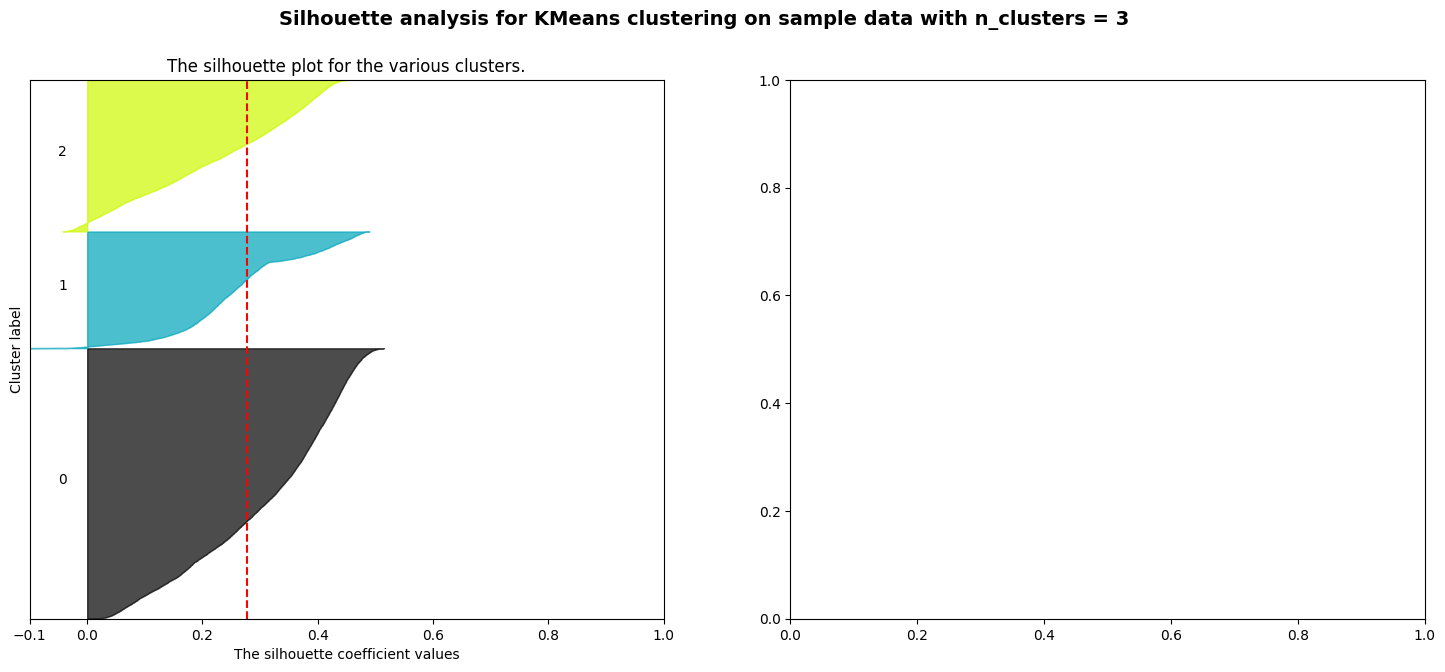

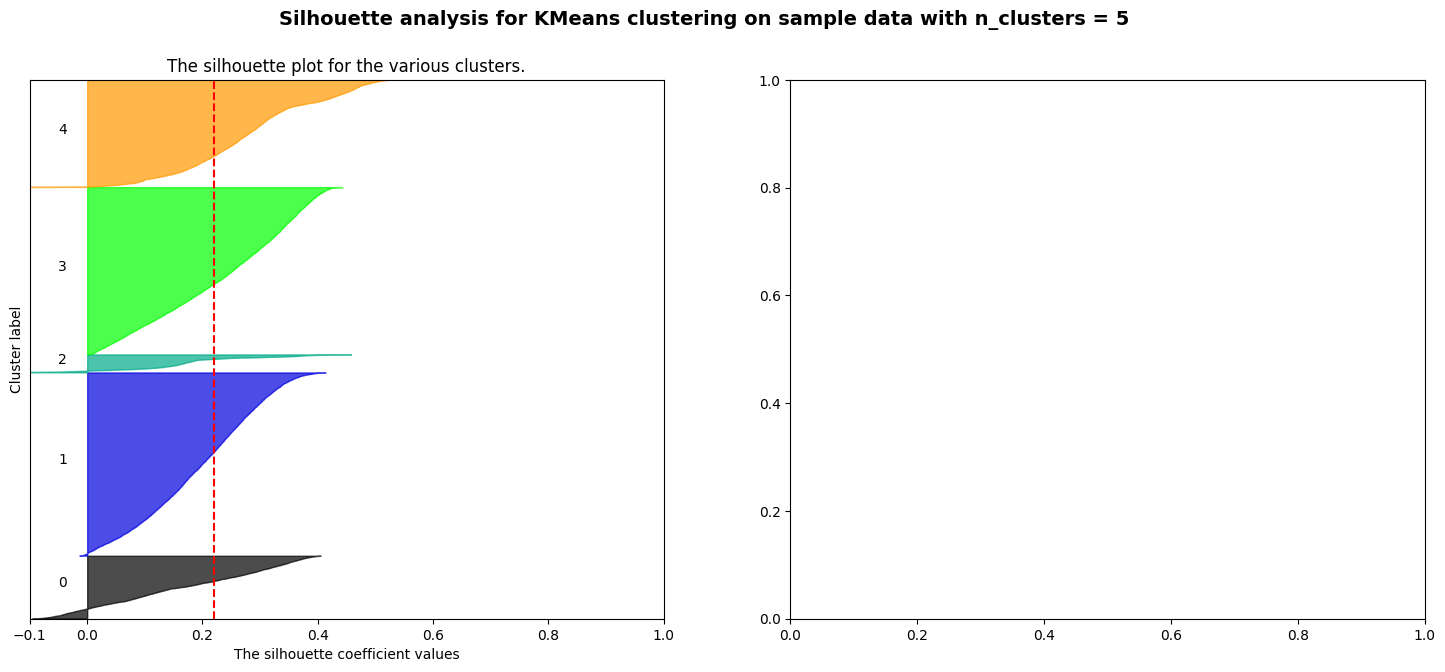

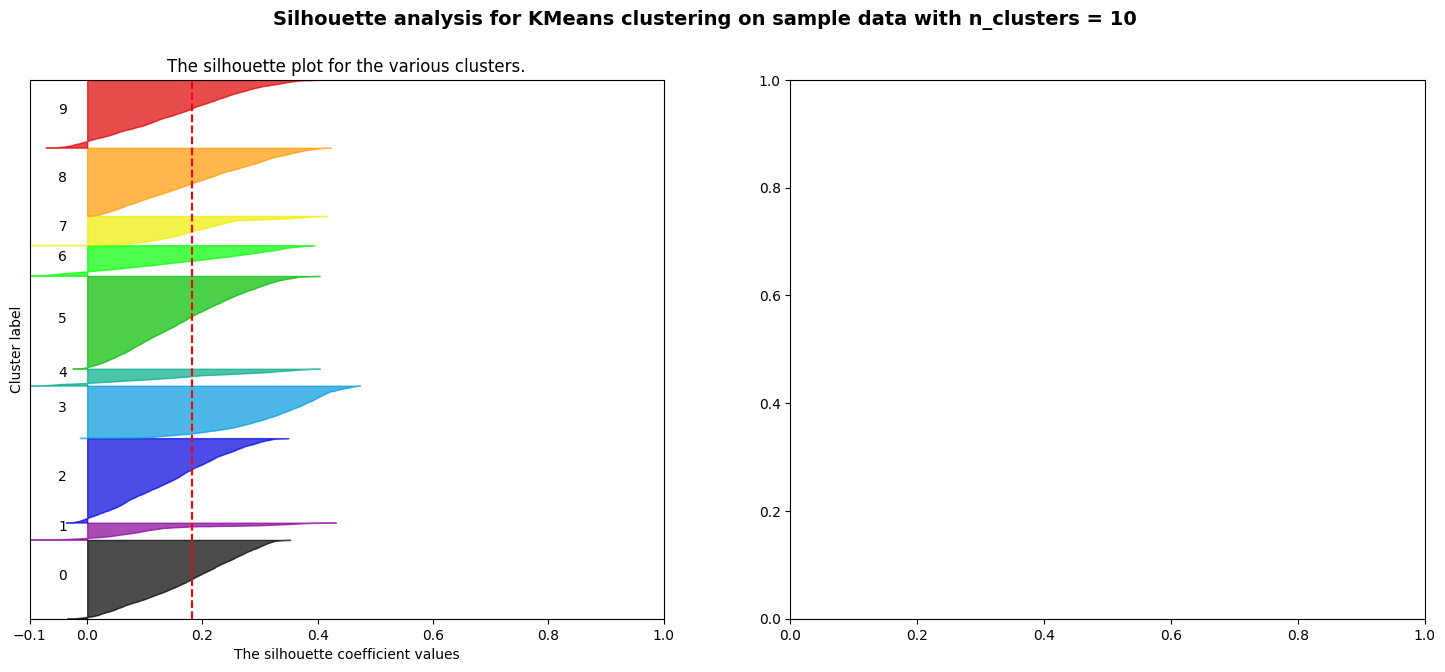

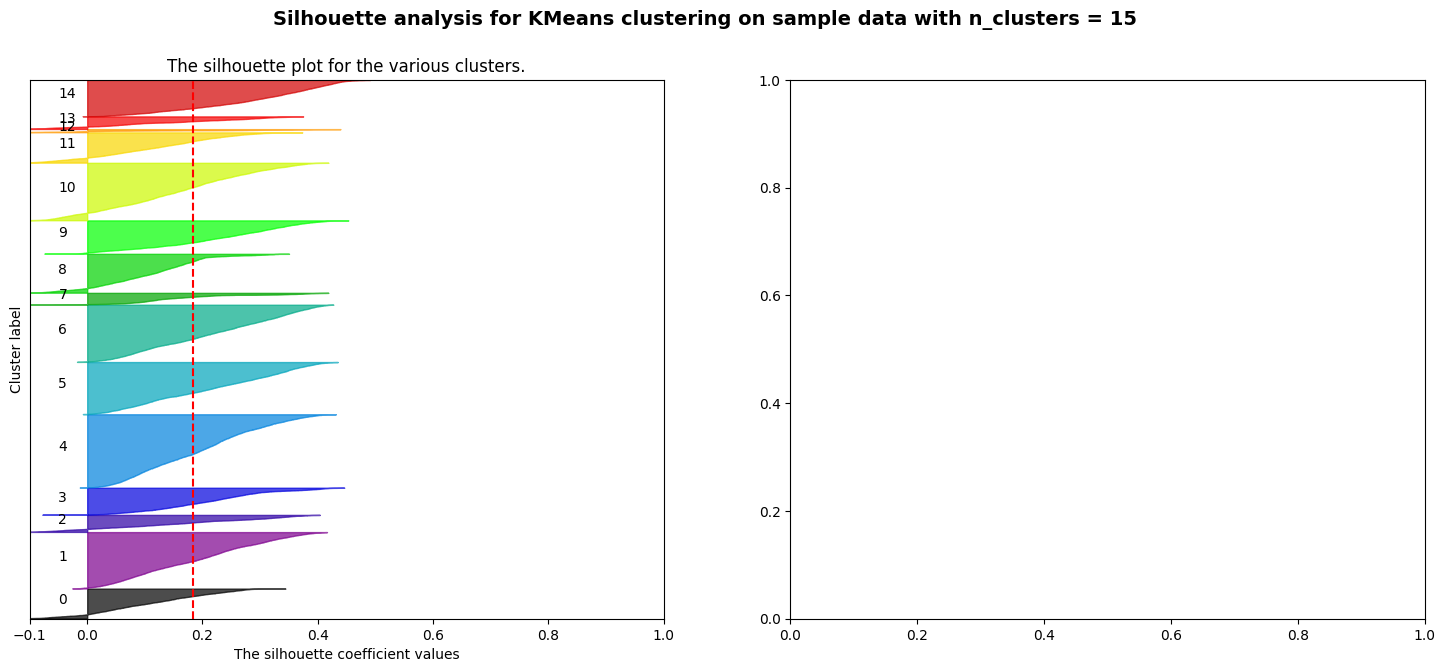

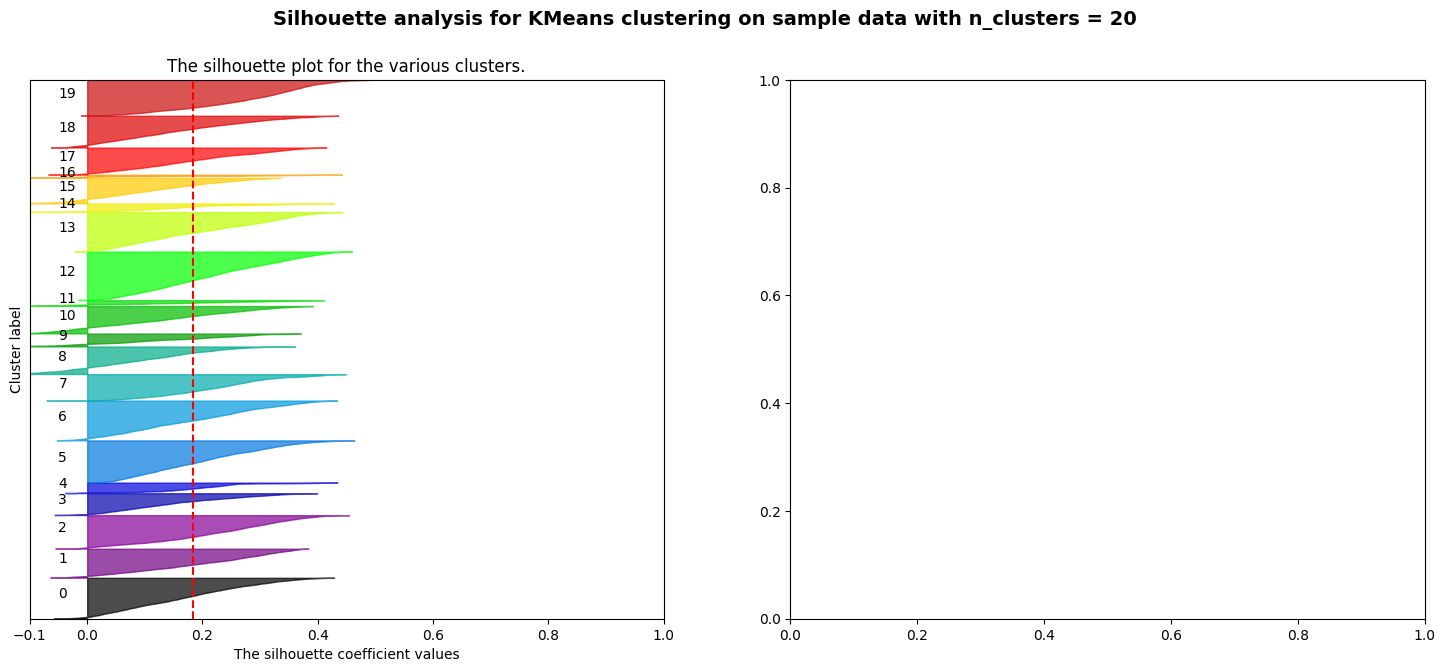

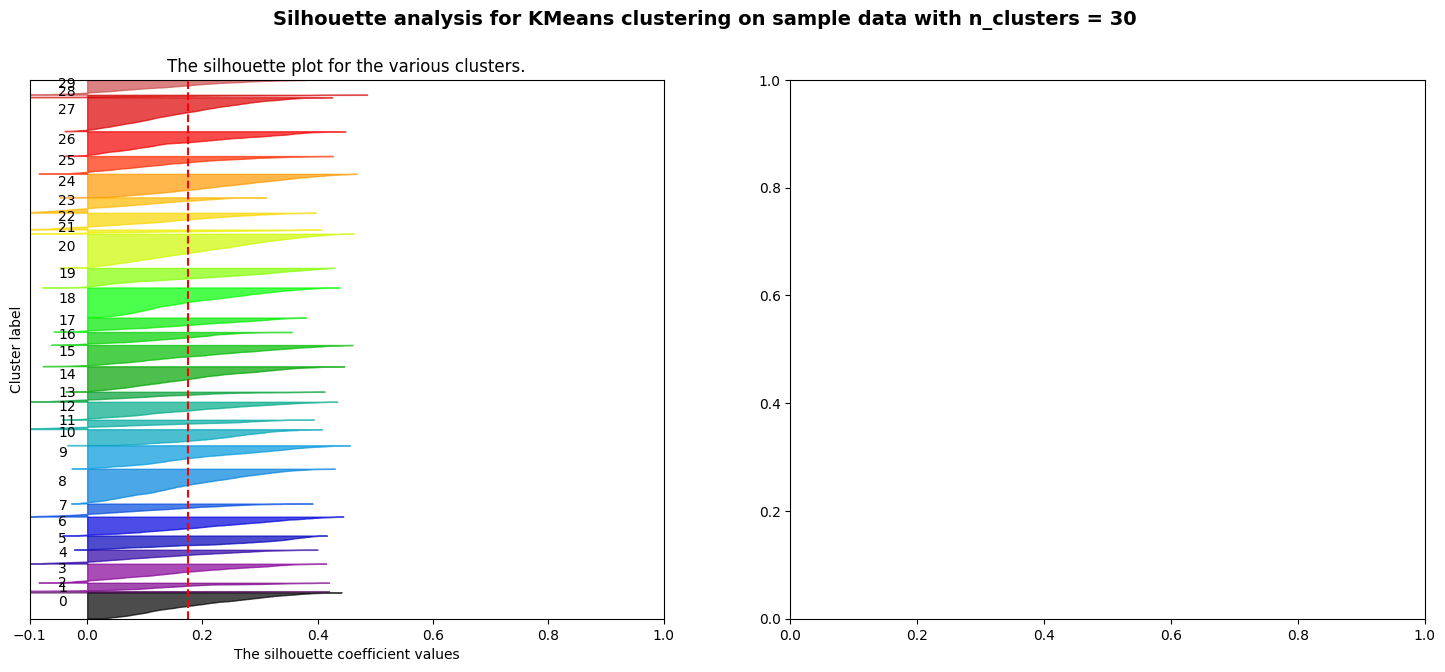

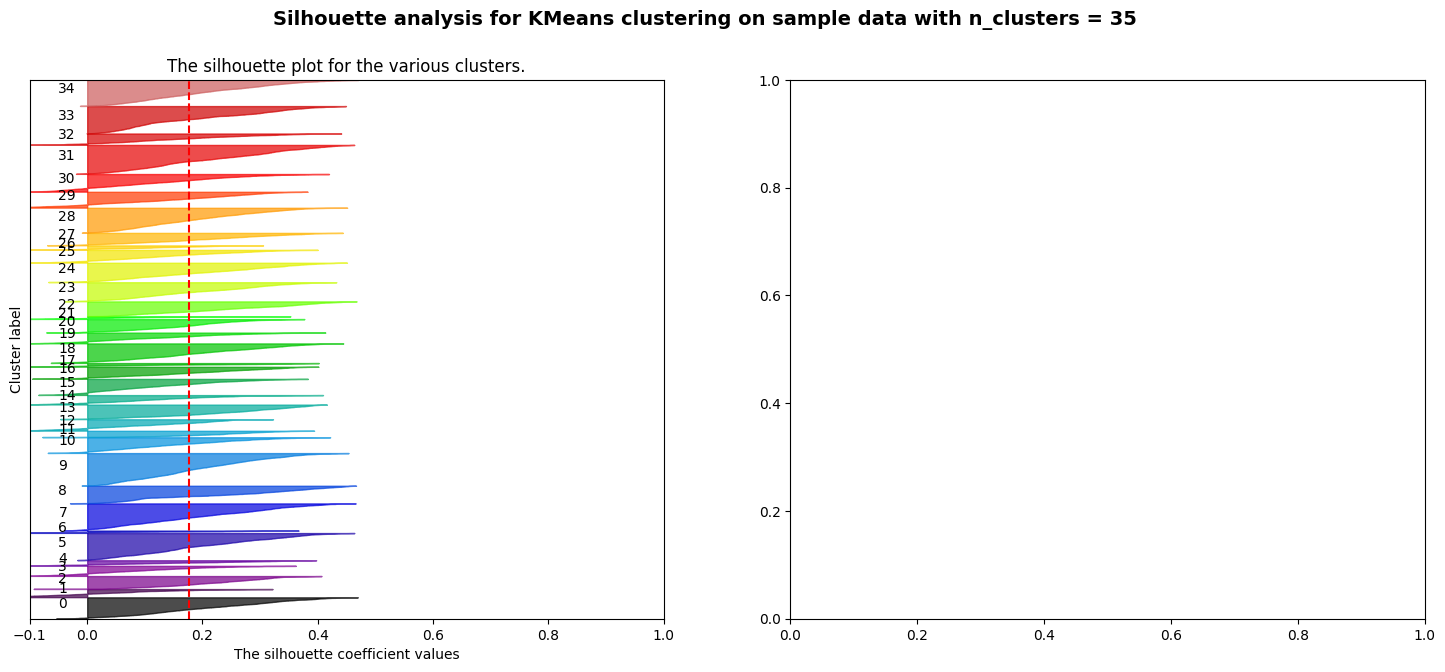

In [129]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(tempdata) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KPrototypes(n_clusters = n_clusters, n_jobs = -1)
    cluster_labels = clusterer.fit_predict(tempdata, categorical = [X.columns.get_loc(col) for col in categorical_columns])

    models.append(clusterer)   
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(tempdata, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tempdata, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [133]:
models[-1].inertia_

AttributeError: 'KPrototypes' object has no attribute 'inertia_'

In [135]:
kmeans_models = []

For n_clusters = 3 The average silhouette_score is : 0.2766574105237791
For n_clusters = 5 The average silhouette_score is : 0.2207582519083319
For n_clusters = 10 The average silhouette_score is : 0.1895139478563106
For n_clusters = 15 The average silhouette_score is : 0.18643591692304415
For n_clusters = 20 The average silhouette_score is : 0.1783006680990712
For n_clusters = 30 The average silhouette_score is : 0.17754402797010158
For n_clusters = 35 The average silhouette_score is : 0.17481768548938562


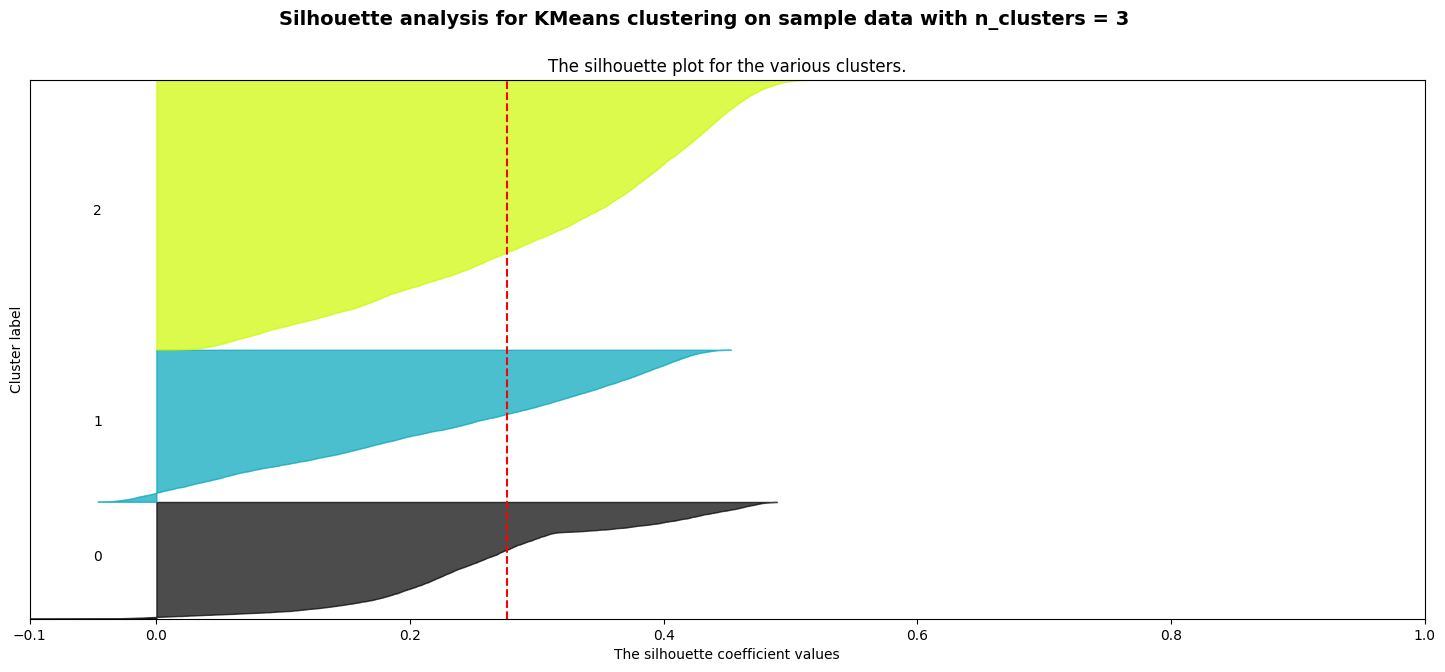

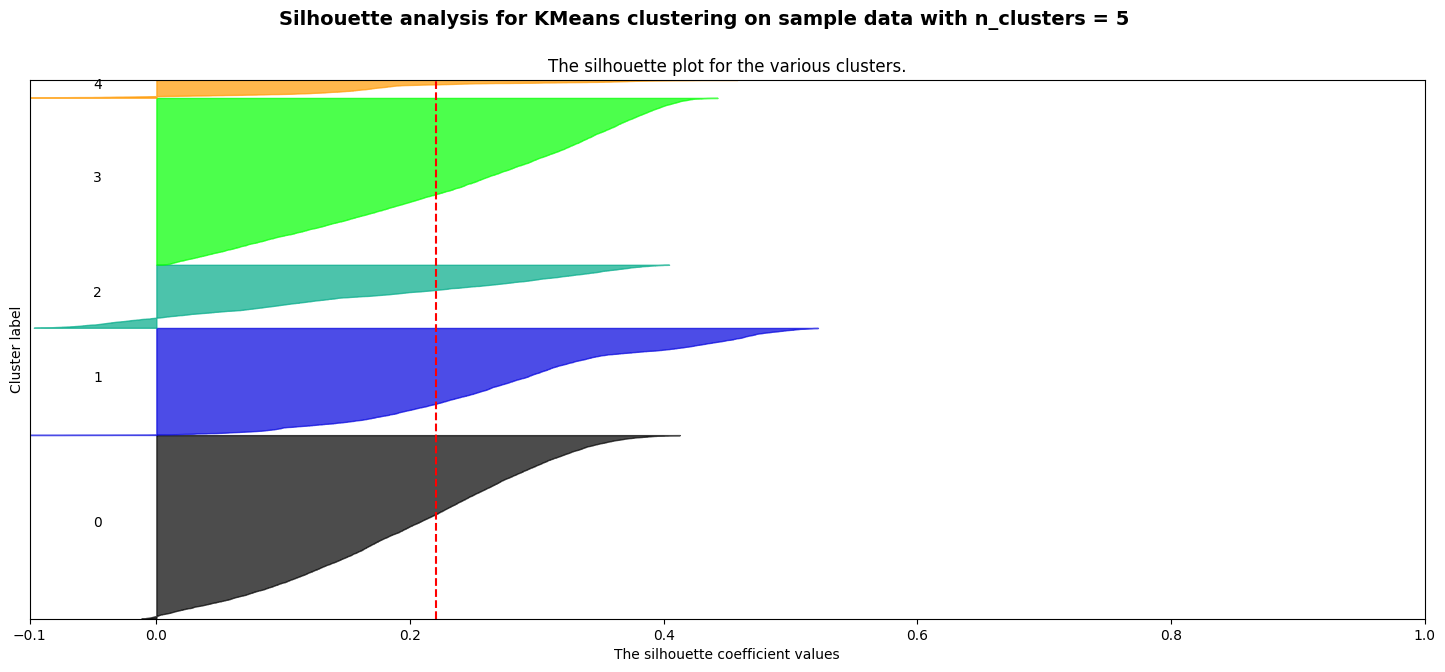

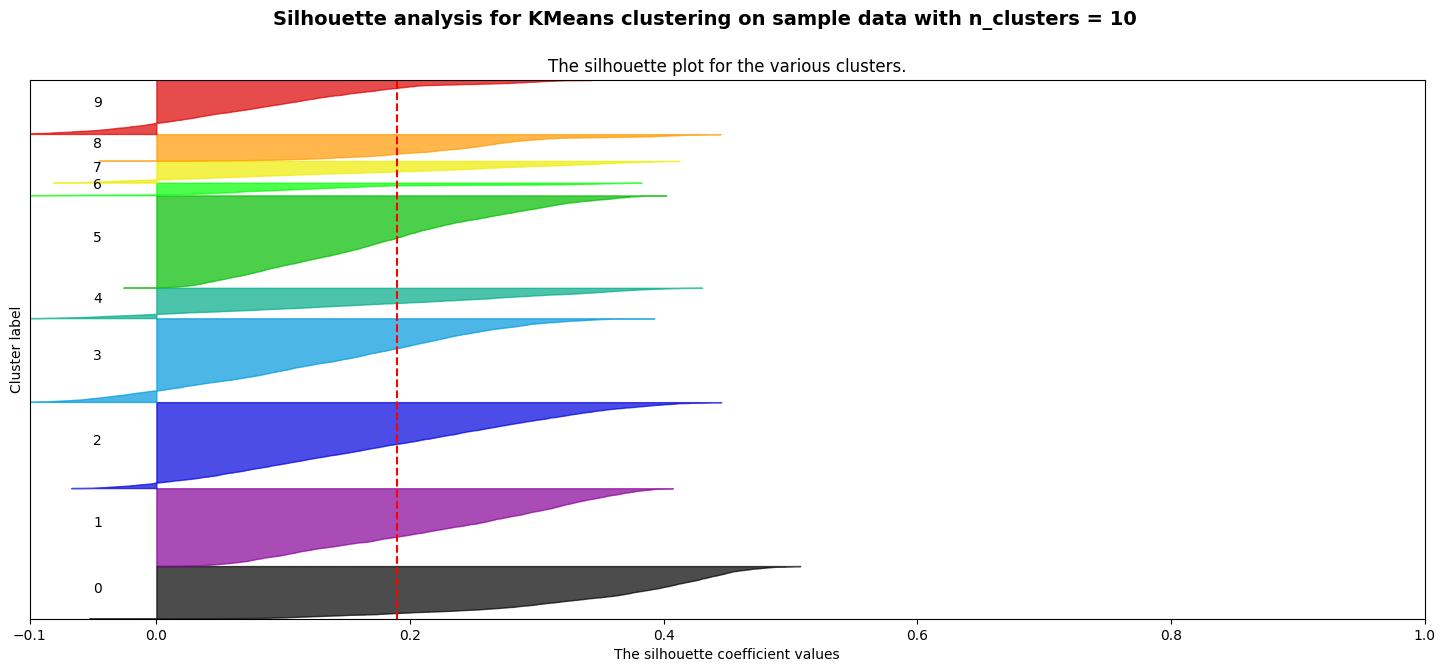

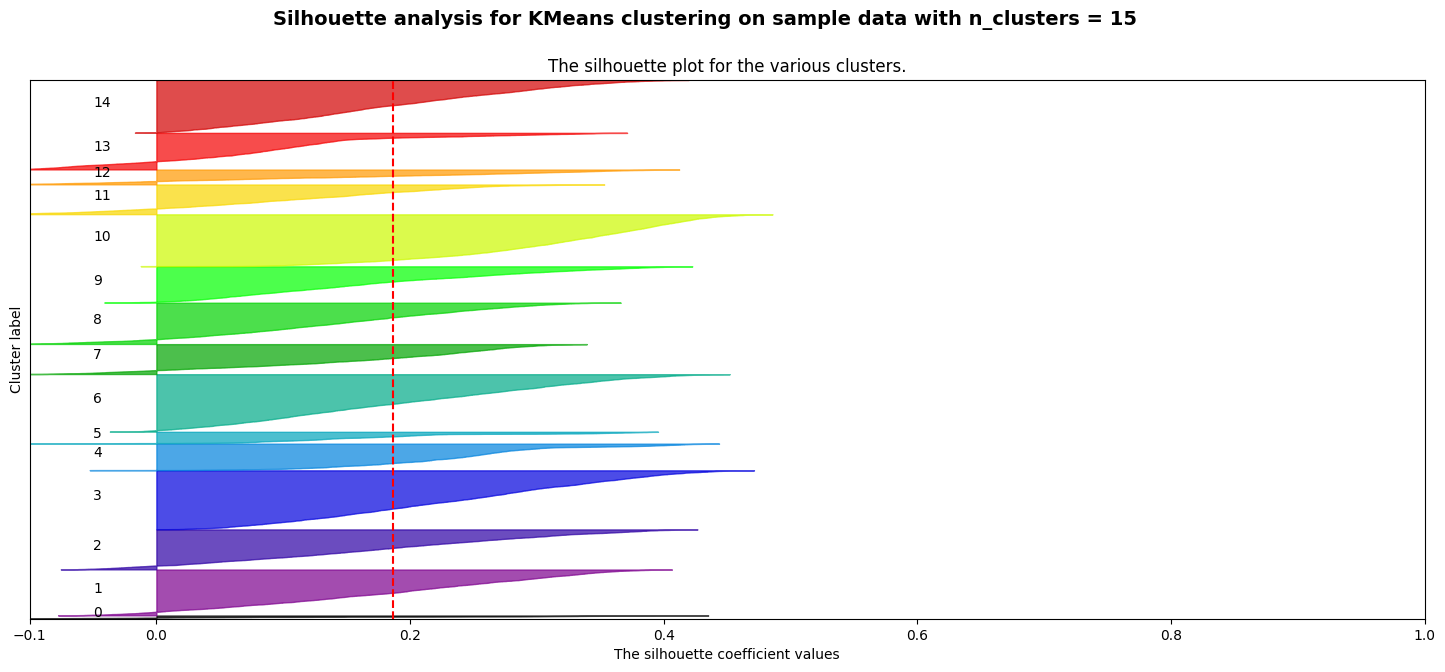

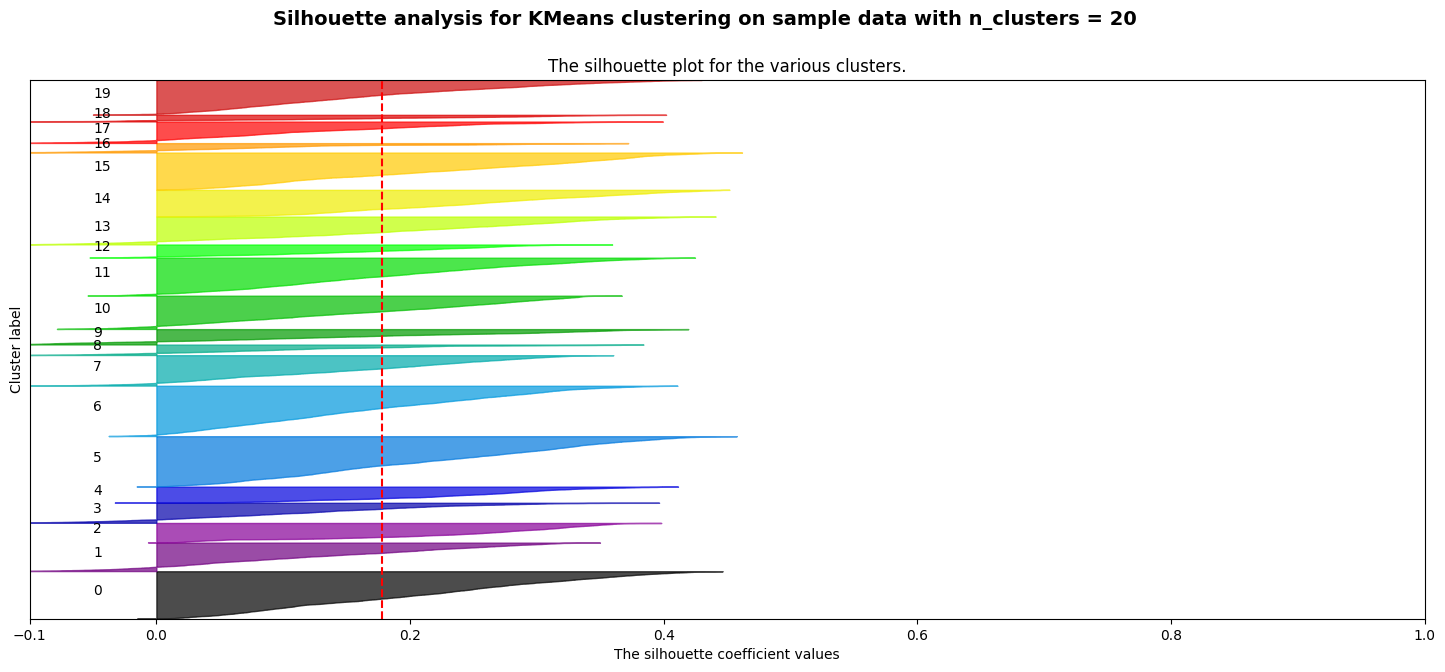

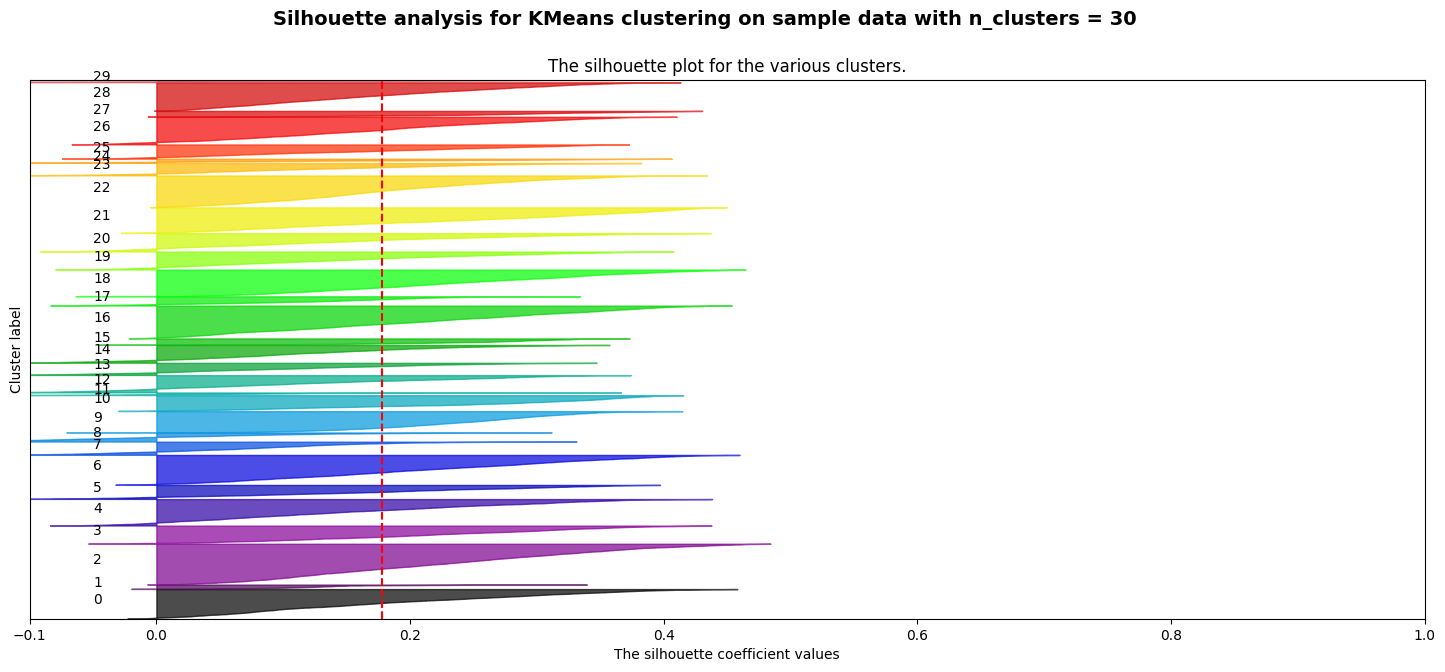

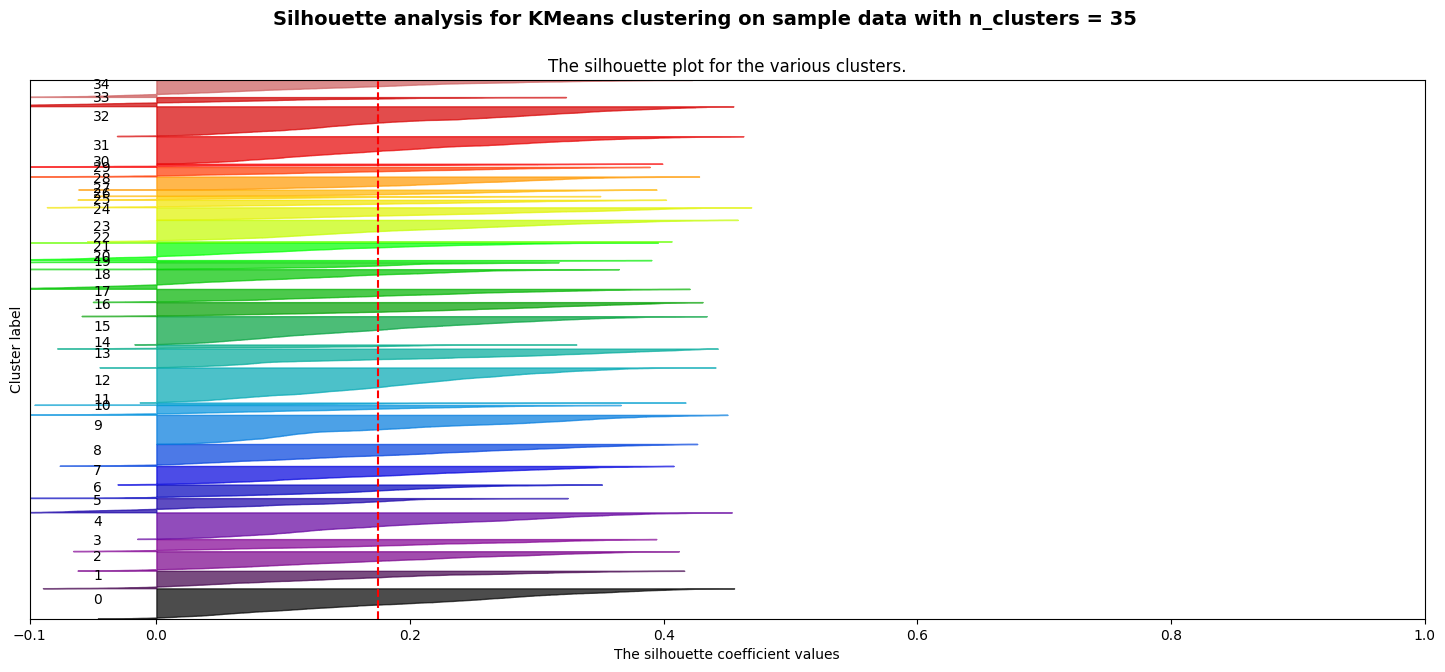

In [138]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(tempdata) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters)
    cluster_labels = clusterer.fit_predict(tempdata)

    kmeans_models.append(clusterer)   
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(tempdata, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tempdata, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()